<h4 align="center">Jian Sun</h4>
<h4 align="center">DUID: 873397832</h4>

# Content
- Introduction
- Model
- Result
  - Train VGG-16 with MNIST from Scratch
  - Predict MNIST by Trained Imagenet Weight in VGG-16
  - Freeze All The Convolutional Layers Retrain VGG-16 Network On MNIST
  - Freeze All The Fully Connected Layers Retrain VGG-16 Network On MNIST
- Discussion
- Appendix

# Introduction

In this project, we implement two methods to recognize MNIST dataset. 

One is to code the VGG-16 from scratch and train it with the MNIST from the very beginning, another method is to train MNISR with existing VGG-16 weight drawn from Imagenet dataset. Specifically, we will discuss the prediction capability after freezing all convolutional layers or freezing all fully connected layers. This will help us to learn the power of different layers in convolutional neural network. Before doing the experiment, we hypothesize that fully connected layer is vital crucial. Without it, the whole nerual network will perform extremely worse. Conversely, convolional layer doesn't play an important layer for MNIST dataset, since it is a binery image dataset, not the colorful one. 

# Model
## Data Processing
The whole MNIST is splitted as the following three parts.

The training set has 48000  28X28 images;  
the validation set has 12000 28X28 images;  
the testing set has 10000 28X28 images.  

Then, given that the VGG-16 doesn't accept image which size is smaller than 32X32, the current images have to be enlarged. The method here is adding paddings. And the final size is 34X34, which fits for VGG-16 model.

## Train VGG-16 with MNIST from Scratch
This part starts from stacking layers. With the help of Sequence() from keras, we build the network up. And we set the batch size as 16, epoch as 500, optimizer as adam, loss as categorical cross entropy loss.

Callbacks funciton is used here to reduce the learning rate automatically and stop the training when validation loss doesn't change for 10 epochs, this function saves us lots of time and is very convenient.

## Predict MNIST by Trained Imagenet Weight in VGG-16
A very powerful function, VGG16() from keras.applications helps to construct the neural network here. And we set the batch size as 16, epoch as 100, optimizer as adam, loss as categorical cross entropy loss.
 
Callbacks funciton is also used here to reduce the learning rate automatically and stop the training when validation loss doesn't change for 8 epochs, this function saves us lots of time and is very convenient.
 
## Freeze All The Convolutional Layers Retrain VGG-16 Network On MNIST
A very powerful function, VGG16() from keras.applications helps to construct the neural network here. And we set the batch size as 16, epoch as 100, optimizer as adam, loss as categorical cross entropy loss. Additionally, the convolutional layers are frozen by code: layer.trainable = False.
 
Callbacks funciton is also used here to reduce the learning rate automatically and stop the training when validation loss doesn't change for 8 epochs, this function saves us lots of time and is very convenient.

## Freeze All The Fully Connected Layers Retrain VGG-16 Network On MNIST
A very powerful function, VGG16() from keras.applications helps to construct the neural network here. And we set the batch size as 16, epoch as 100, optimizer as adam, loss as categorical cross entropy loss. Additionally, the fully connected layers are frozen by code: layer.trainable = False.
 
Callbacks funciton is also used here to reduce the learning rate automatically and stop the training when validation loss doesn't change for 8 epochs, this function saves us lots of time and is very convenient.


# Train VGG-16 with MNIST from Scratch

The training stops at epoach 11 with the training loss of 4.9966e-04, the training accuracy of 0.9999, the validation loss of 0.0688 and the validation accuracy of 0.9934, when the learning rate is 7.999999979801942e-07.

Next, we use this weight to predict testing set, the prediction loss is 0.0492 and the prediction accuracy is 0.9953.



Got 9953 / 10000 correct
Accuracy = 0.995300
[[ 977    0    0    0    0    0    2    1    0    0]
 [   0 1130    1    2    0    0    0    1    1    0]
 [   0    0 1029    1    0    0    0    2    0    0]
 [   0    0    0 1006    0    3    0    0    1    0]
 [   0    0    0    0  977    0    1    0    0    4]
 [   0    0    0    5    0  886    1    0    0    0]
 [   4    2    0    0    0    0  952    0    0    0]
 [   0    2    1    0    0    0    0 1024    0    1]
 [   0    0    0    1    0    0    0    0  972    1]
 [   0    0    0    0    4    1    0    2    2 1000]]
              precision    recall  f1-score   support

           0      0.996     0.997     0.996       980
           1      0.996     0.996     0.996      1135
           2      0.998     0.997     0.998      1032
           3      0.991     0.996     0.994      1010
           4      0.996     0.995     0.995       982
           5      0.996     0.993     0.994       892
           6      0.996     0.994     0.995  

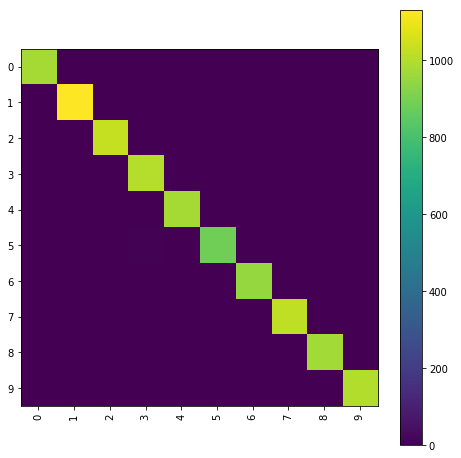

In [111]:
print('Got %d / %d correct' % (num_correct, num_test))
print('Accuracy = %f' % (np.mean(y_test == y_pred)))
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred,
                            target_names=list(label_dict.values()),digits=3))
plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(y_test, y_pred)
classes = list(label_dict.values())
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

# Predict MNIST by Trained Imagenet Weight in VGG-16

The training stops at epoach 37 with the training loss of 0.0303, the training accuracy of 0.9920, the validation loss of 0.0724 and the validation accuracy of 0.9778, when the learning rate is 6.400000529538374e-08.

Next, we use this weight to predict testing set, the prediction loss is 0.0672 and the prediction accuracy is 0.9788.

Got 9788 / 10000 correct
Accuracy = 0.978800
[[ 969    0    1    0    0    4    5    1    0    0]
 [   0 1123    0    0    3    0    4    4    1    0]
 [   1    1 1008    4    2    4    4    5    2    1]
 [   0    0   10  977    0   16    0    3    2    2]
 [   0    1    1    0  967    1    2    3    4    3]
 [   2    0    7    9    1  864    0    2    6    1]
 [   7    0    4    0    0    2  944    0    1    0]
 [   0    5    4    2    8    0    0 1004    1    4]
 [   0    0    6    2    3    4    1    1  956    1]
 [   3    0    3    2    7    2    0    5   11  976]]
              precision    recall  f1-score   support

           0      0.987     0.989     0.988       980
           1      0.994     0.989     0.992      1135
           2      0.966     0.977     0.971      1032
           3      0.981     0.967     0.974      1010
           4      0.976     0.985     0.980       982
           5      0.963     0.969     0.966       892
           6      0.983     0.985     0.984  

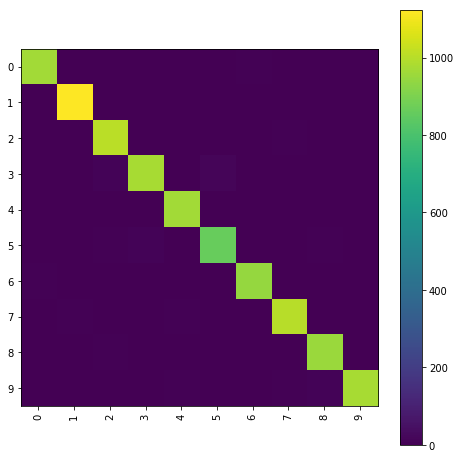

In [0]:
print('Got %d / %d correct' % (num_correct, num_test))
print('Accuracy = %f' % (np.mean(y_test == y_pred)))
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred,
                            target_names=list(label_dict.values()),digits=3))
plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(y_test, y_pred)
classes = list(label_dict.values())
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

# Freeze All The Convolutional Layers Retrain VGG-16 Network On MNIST

The training stops at epoach 22 with the training loss of 0.0272, the training accuracy of 0.9924, the validation loss of 0.0723 and the validation accuracy of 0.9788, when the learning rate is 6.400000529538374e-08.

Next, we use this weight to predict testing set, the prediction loss is 0.0693 and the prediction accuracy is 0.9771.

Got 9771 / 10000 correct
Accuracy = 0.977100
[[ 967    0    1    0    0    3    5    1    2    1]
 [   0 1125    0    0    3    0    4    2    1    0]
 [   1    2 1000    8    2    6    3    6    3    1]
 [   0    0    9  976    0   18    0    4    2    1]
 [   0    1    0    0  968    1    3    2    3    4]
 [   2    0    4   13    1  861    3    2    5    1]
 [   7    1    2    0    1    3  941    0    2    1]
 [   0    3    4    3   10    0    0 1002    1    5]
 [   0    0    3    4    2    4    2    2  955    2]
 [   3    0    3    3    5    3    0    4   12  976]]
              precision    recall  f1-score   support

           0      0.987     0.987     0.987       980
           1      0.994     0.991     0.993      1135
           2      0.975     0.969     0.972      1032
           3      0.969     0.966     0.968      1010
           4      0.976     0.986     0.981       982
           5      0.958     0.965     0.961       892
           6      0.979     0.982     0.981  

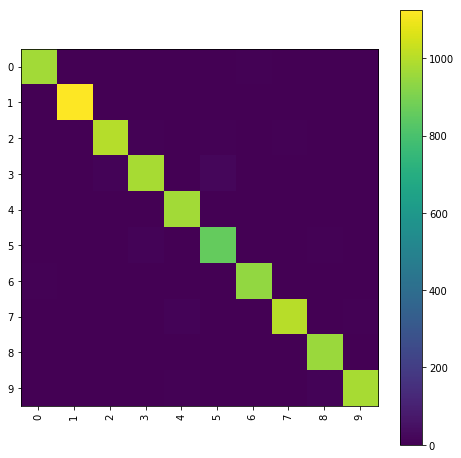

In [0]:
print('Got %d / %d correct' % (num_correct, num_test))
print('Accuracy = %f' % (np.mean(y_test == y_pred)))
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred,
                            target_names=list(label_dict.values()),digits=3))
plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(y_test, y_pred)
classes = list(label_dict.values())
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

# Freeze All The Fully Connected Layers Retrain VGG-16 Network On MNIST

The training stops at epoach 9 with the training loss of 2.4916, the training accuracy of 0.1330, the validation loss of 2.5009 and the validation accuracy of 0.1352, when the learning rate is 8.000000525498762e-06.

Next, we use this weight to predict testing set, the prediction loss is 2.4918 and the prediction accuracy is  0.1296.


Got 1296 / 10000 correct
Accuracy = 0.129600
[[   0    0    0    0    0    0    0    0  980    0]
 [   0    0    0    4  821  266    0    2   34    8]
 [   0    0    0    0    5    0    0   10 1015    2]
 [   0    0    0    0    4    0    0    0 1005    1]
 [   0    0    0    5  315   27    0   12  612   11]
 [   0    0    0    0    8    0    0    2  881    1]
 [   0    0    0    0    8    1    0    3  939    7]
 [   0    0    0    0  217   48    0    8  702   53]
 [   0    0    0    0    2    0    0    0  972    0]
 [   0    0    0    0   15    5    0    0  988    1]]
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       980
           1      0.000     0.000     0.000      1135
           2      0.000     0.000     0.000      1032
           3      0.000     0.000     0.000      1010
           4      0.226     0.321     0.265       982
           5      0.000     0.000     0.000       892
           6      0.000     0.000     0.000  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


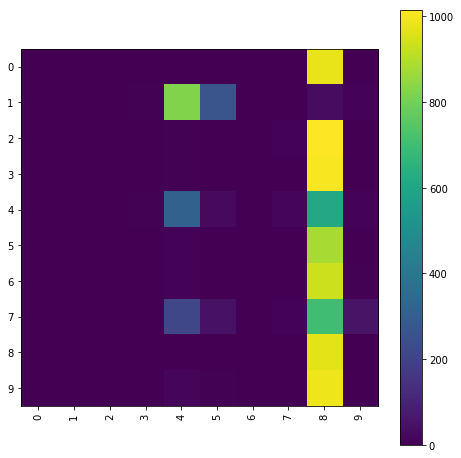

In [0]:
print('Got %d / %d correct' % (num_correct, num_test))
print('Accuracy = %f' % (np.mean(y_test == y_pred)))
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred,
                            target_names=list(label_dict.values()),digits=3))
plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(y_test, y_pred)
classes = list(label_dict.values())
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)


 
## Discussion

Here is a detailed table for all 4 parts.

Methods           | Scratch  | Retrain | Freeze Conv | Freeze Fully Con
------------------|----------|---------|-------------|---------------------------
Train Acc         | 99.99%   | 99.20%  | 99.24%      | 13.30%
Train Loss        | 5e^-4    | 0.0303  | 0.0272      | 2.4916 
Valid Acc         | 99.34%   | 97.78%  | 97.88%      | 13.52%
Valid Loss        | 0.0688   | 0.0724  | 0.0723      | 2.5009
Test Acc          | 99.53%   | 97.88%  | 97.71%      | 12.96%
Test Loss         | 0.0492   | 0.0672  | 0.0693      | 2.4918
Time Per Epoch    | 143s     | 5s      | 5.5s        | 3s
Learning Rate     | 8e^-7    | 6e^-8   | 6e^-8       | 8e^-6

As we can see, the total rank for training part is Scratch > Freeze Conv > Retrain > Freeze Fully Con. Scratch performs best on training part. VGG-16 freezing all convolutional layers performs bettern than Retrain it on MNIST. It is a little weird, but it is truth. Meanwhile, VGG-16 freezing all full connected layers performs worst. 

The total rank for testing part is Scratch > Retrain > Freeze Conv >  Freeze Fully Con. 

In general, from this comparison, we recognize that full connected layer is so important for CNN, however, if we close convolutional layer, our result will not be influenced a lot. Perhaps, it is due to MNIST dataset as the binery image dataset, not the colorful one. Thus lossing convoluitonal layers doesn't affect a lot on CNN's performance. However, lossing fully connected layer means different, it will ruin your prediction, since we need softmax to do classification.

CNN is a powerful model, there is huge CNN families. We hope to dig more.

# Appendix
## Load Packages

In [0]:
# import dataset and seperate them as train set and test set
# index x represents image, index y represents label

import tensorflow as tf
import keras
from numpy.linalg import *
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import Sequential
from keras.applications import VGG16
from keras.utils import to_categorical
from keras.layers.convolutional import *
from keras import callbacks, layers, optimizers, models
import os, cv2, random, sklearn, sklearn.metrics, numpy as np
from sklearn.preprocessing import StandardScaler
from keras.metrics import categorical_crossentropy
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Activation, Dropout, Flatten
from sklearn.metrics import classification_report, confusion_matrix 
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from __future__ import absolute_import, division, print_function, unicode_literals

## Load Dataset and Data Preparing

In [0]:
# download MNIST dataset from keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
y_train_labels = to_categorical(y_train)
y_test_labels = to_categorical(y_test)
# make sure the 10 classes
label_dict = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4',
              5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}


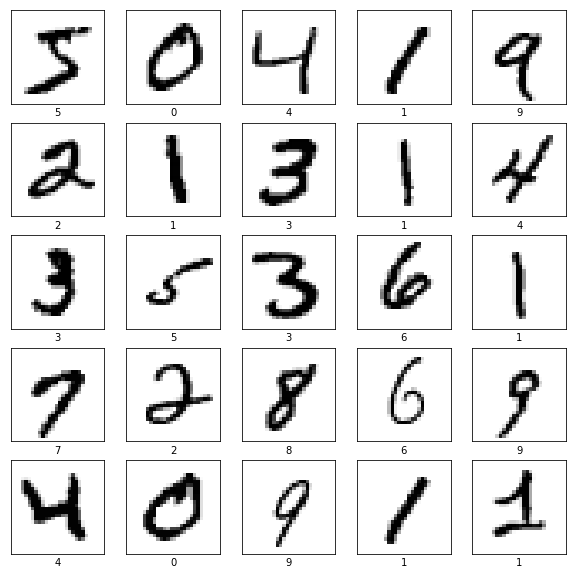

In [86]:
# Verify that the data is in the correct format.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(label_dict[y_train[i]])
plt.show()

In [186]:
x_train = x_train.reshape(np.shape(x_train)[0], 28*28)
x_test = x_test.reshape(np.shape(x_test)[0], 28*28)
# Convert the images into 3 channels
X_train=np.dstack([x_train] * 3)
X_test=np.dstack([x_test] * 3)
print(np.shape(X_train))
print(np.shape(X_test))
# Reshape images as per the tensor format required by tensorflow
X_train = X_train.reshape(-1, 28,28,3)
X_test = X_test.reshape (-1,28,28,3)
print(np.shape(X_train))
print(np.shape(X_test))
# Resize the images 34*34 as required by VGG16
X_tr = np.pad(X_train, ((0,0),(3,3),(3,3),(0,0)), 'constant')
X_te = np.pad(X_test, ((0,0),(3,3),(3,3),(0,0)), 'constant')
X_tr = np.float32(X_tr)/255.
X_te = np.float32(X_te)/255.
print(np.shape(X_tr))
print(np.shape(X_te))

(60000, 784, 3)
(10000, 784, 3)
(60000, 28, 28, 3)
(10000, 28, 28, 3)
(60000, 34, 34, 3)
(10000, 34, 34, 3)


In [187]:

# Splitting train data as train and validation data
train_X,valid_X,train_label,valid_label = train_test_split(X_tr,
                                                           y_train_labels,
                                                           test_size=0.2,
                                                           random_state=13)
# Finally check the data size whether it is as per tensorflow and VGG16 requirement
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 34, 34, 3), (12000, 34, 34, 3), (48000, 10), (12000, 10))

In [0]:
# Define the parameters for instanitaing VGG16 model. 
IMG_WIDTH = 34
IMG_HEIGHT = 34
IMG_DEPTH = 3
BATCH_SIZE = 16

## Train VGG-16 with MNIST from Scratch

In [176]:
input_tensor = Input(shape=(IMG_WIDTH, IMG_HEIGHT, IMG_DEPTH))
#input_tensor = input_tensor
vg16_m = VGG16(weights=None,input_tensor = input_tensor)
type(vg16_m)
model = Sequential()
for layer in vg16_m.layers[0:22]:
  model.add(layer)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 34, 34, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 34, 34, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 17, 17, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 17, 17, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 17, 17, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)         295168    
__________

In [140]:
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 34, 34, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 34, 34, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 17, 17, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 17, 17, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 17, 17, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)         295168    
__________

In [0]:
NB_EPOCHS = 100

# Compile the model.
model.compile(Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [105]:
from keras import callbacks
# Incorporating reduced learning and early stopping for callback
reduce_learning = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

eary_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0003,
    patience=6,
    verbose=1,
    mode='auto')

callbacks = [reduce_learning, eary_stopping]

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [106]:
mt=model.fit(train_X, train_label, 
             batch_size=16, epochs=NB_EPOCHS,
             verbose=2, callbacks=callbacks,
             validation_data=(valid_X, valid_label)
            )

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 147s - loss: 0.0311 - acc: 0.9933 - val_loss: 0.0585 - val_acc: 0.9894
Epoch 2/100
 - 144s - loss: 0.0332 - acc: 0.9933 - val_loss: 0.0518 - val_acc: 0.9914
Epoch 3/100
 - 144s - loss: 0.0261 - acc: 0.9943 - val_loss: 0.0554 - val_acc: 0.9905
Epoch 4/100
 - 143s - loss: 0.0269 - acc: 0.9948 - val_loss: 0.0533 - val_acc: 0.9892

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
Epoch 5/100
 - 143s - loss: 0.0080 - acc: 0.9984 - val_loss: 0.0374 - val_acc: 0.9930
Epoch 6/100
 - 143s - loss: 0.0030 - acc: 0.9992 - val_loss: 0.0491 - val_acc: 0.9936
Epoch 7/100
 - 143s - loss: 0.0039 - acc: 0.9994 - val_loss: 0.0528 - val_acc: 0.9937

Epoch 00007: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.
Epoch 8/100
 - 143s - loss: 0.0015 - acc: 0.9997 - val_loss: 0.0550 - val_acc: 0.9934
Epoch 9/100
 - 143s - loss: 7.9653e-04 - acc: 0.9999 - val_loss: 0.0622 - val_acc: 0.9932
Epoch 10/

In [110]:
test_loss, test_acc = model.evaluate(X_te, y_test_labels)
print('Test Accuracy:%4f, Test Loss:%4f.' %(test_acc,test_loss))
# Make Prediction
pred_result = model.predict(X_te)
y_pred=[]
for i in range(np.shape(y_test)[0]):
  num = np.where(pred_result[i]==max(pred_result[i]))
  y_pred.append(num[0][0])
y_pred = np.transpose(y_pred)
# calculate accuracy
num_test = len(y_test)
num_correct = np.sum(y_pred == y_test)
print('Got %d / %d correct' % (num_correct, num_test))
print('Accuracy = %f' % (np.mean(y_test == y_pred)))
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred,
                            target_names=list(label_dict.values()),digits=3))

10000/10000 [==============================] - 3s 310us/step
Test Accuracy:0.995300, Test Loss:0.049209.
Got 9953 / 10000 correct
Accuracy = 0.995300
[[ 977    0    0    0    0    0    2    1    0    0]
 [   0 1130    1    2    0    0    0    1    1    0]
 [   0    0 1029    1    0    0    0    2    0    0]
 [   0    0    0 1006    0    3    0    0    1    0]
 [   0    0    0    0  977    0    1    0    0    4]
 [   0    0    0    5    0  886    1    0    0    0]
 [   4    2    0    0    0    0  952    0    0    0]
 [   0    2    1    0    0    0    0 1024    0    1]
 [   0    0    0    1    0    0    0    0  972    1]
 [   0    0    0    0    4    1    0    2    2 1000]]
              precision    recall  f1-score   support

           0      0.996     0.997     0.996       980
           1      0.996     0.996     0.996      1135
           2      0.998     0.997     0.998      1032
           3      0.991     0.996     0.994      1010
           4      0.996     0.995     0.995     

## Predict MNIST by Trained Imagenet Weight in VGG-16

In [195]:
#  Create base model of VGG16
from keras.layers import Input
input_tensor = Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH))
conv_base = VGG16(weights='imagenet',include_top=False, 
                  input_tensor = input_tensor)

type(conv_base)

'\n#conv_base.summary()\nmodel = Sequential()\nfor layer in conv_base.layers:\n          model.add(layer)\n          \nmodel.summary()\n'

In [0]:
 # Extracting features
train_features = conv_base.predict(np.array(train_X), batch_size=BATCH_SIZE, verbose=1)
test_features = conv_base.predict(np.array(X_te), batch_size=BATCH_SIZE, verbose=1)
val_features = conv_base.predict(np.array(valid_X), batch_size=BATCH_SIZE, verbose=1)

12000/12000 [==============================] - 5s 383us/step


In [0]:
np.savez("train_features", train_features, train_label)
np.savez("test_features", test_features, y_test_labels)
np.savez("val_features", val_features, valid_label)

In [0]:
# Current shape of features
print(train_features.shape, "\n",  test_features.shape, "\n", val_features.shape)

(48000, 1, 1, 512) 
 (10000, 1, 1, 512) 
 (12000, 1, 1, 512)


In [0]:
# Flatten extracted features
train_features_flat = np.reshape(train_features, (48000, 1*1*512))
test_features_flat = np.reshape(test_features, (10000, 1*1*512))
val_features_flat = np.reshape(val_features, (12000, 1*1*512))

In [0]:
from keras import models
from keras.models import Model
from keras import layers
from keras import optimizers
from keras import callbacks
from keras.layers.advanced_activations import LeakyReLU
model_c = models.Sequential()
model_c.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
model_c.add(layers.LeakyReLU(alpha=0.1))
model_c.add(layers.Dense(10, activation='softmax'))

In [0]:
NB_TRAIN_SAMPLES = train_features_flat.shape[0]
NB_VALIDATION_SAMPLES = val_features_flat.shape[0]
NB_EPOCHS = 100

# Compile the model.
model_c.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Incorporating reduced learning and early stopping for callback
reduce_learning = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

eary_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0003,
    patience=8,
    verbose=1,
    mode='auto')

callbacks = [reduce_learning, eary_stopping]

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [0]:
# Train the the model
mt=model_c.fit(
    train_features_flat,
    train_label,
    epochs=NB_EPOCHS,
    validation_data=(val_features_flat, valid_label),
    callbacks=callbacks
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 5s 112us/step - loss: 0.3400 - acc: 0.8962 - val_loss: 0.1871 - val_acc: 0.9385
Epoch 2/100
48000/48000 [==============================] - 5s 97us/step - loss: 0.1631 - acc: 0.9472 - val_loss: 0.1368 - val_acc: 0.9557
Epoch 3/100
48000/48000 [==============================] - 5s 97us/step - loss: 0.1389 - acc: 0.9547 - val_loss: 0.1327 - val_acc: 0.9575
Epoch 4/100
48000/48000 [==============================] - 5s 97us/step - loss: 0.1198 - acc: 0.9608 - val_loss: 0.1475 - val_acc: 0.9511
Epoch 5/100
48000/48000 [==============================] - 5s 95us/step - loss: 0.1087 - acc: 0.9643 - val_loss: 0.1182 - val_acc: 0.9625
Epoch 6/100
48000/48000 [==============================] - 5s 96us/step - loss: 0.1028 - acc: 0.9663 - val_loss: 0.1109 - val_acc: 0.9652
Epoch 7/100
48000/48000 [==============================] - 5s 97us/step - loss: 0.0941 - acc: 0.9685 - val_loss: 0.0994 -

In [0]:
# Evaluate accuracy
test_loss, test_acc = model_c.evaluate(test_features_flat, y_test_labels)
print('Test Accuracy:%4f, Test Loss:%4f.' %(test_acc,test_loss))

10000/10000 [==============================] - 0s 36us/step
Test Accuracy:0.978800, Test Loss:0.067221.


In [0]:
# Make Prediction
pred_result = model_c.predict(test_features_flat)
y_pred=[]
for i in range(np.shape(y_test)[0]):
    num = np.where(pred_result[i]==max(pred_result[i]))
    y_pred.append(num[0][0])
y_pred = np.transpose(y_pred)

In [0]:
# calculate accuracy
num_test = len(y_test)
num_correct = np.sum(y_pred == y_test)
print('Got %d / %d correct' % (num_correct, num_test))
print('Accuracy = %f' % (np.mean(y_test == y_pred)))
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred,
                            target_names=list(label_dict.values()),digits=3))

Got 9788 / 10000 correct
Accuracy = 0.978800
[[ 969    0    1    0    0    4    5    1    0    0]
 [   0 1123    0    0    3    0    4    4    1    0]
 [   1    1 1008    4    2    4    4    5    2    1]
 [   0    0   10  977    0   16    0    3    2    2]
 [   0    1    1    0  967    1    2    3    4    3]
 [   2    0    7    9    1  864    0    2    6    1]
 [   7    0    4    0    0    2  944    0    1    0]
 [   0    5    4    2    8    0    0 1004    1    4]
 [   0    0    6    2    3    4    1    1  956    1]
 [   3    0    3    2    7    2    0    5   11  976]]
              precision    recall  f1-score   support

           0      0.987     0.989     0.988       980
           1      0.994     0.989     0.992      1135
           2      0.966     0.977     0.971      1032
           3      0.981     0.967     0.974      1010
           4      0.976     0.985     0.980       982
           5      0.963     0.969     0.966       892
           6      0.983     0.985     0.984  

## Freeze All The Convolutional Layers Retrain VGG-16 Network On MNIST

In [0]:
#  Create base model of VGG16
from keras.applications import VGG16;
from keras.layers import Input
input_tensor = Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH))
freeze = VGG16(weights='imagenet',include_top=False, 
                  input_tensor = input_tensor)
freeze.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 34, 34, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 34, 34, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 34, 34, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 17, 17, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 17, 17, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 17, 17, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [0]:
# Freeze the layers which you don't want to train. Here I am freezing the first 5 layers.
for layer in freeze.layers:
    layer.trainable = False

'\n    for layer in freeze.layers[3:4]:\n    layer.trainable = False\nfor layer in freeze.layers[6:8]:\n    layer.trainable = False\nfor layer in freeze.layers[10:12]:\n    layer.trainable = False\nfor layer in freeze.layers[14:16]:\n    layer.trainable = False\n    '

In [0]:
# Extracting features
train_features = freeze.predict(np.array(train_X), batch_size=BATCH_SIZE, verbose=1)
test_features = freeze.predict(np.array(X_te), batch_size=BATCH_SIZE, verbose=1)
val_features = freeze.predict(np.array(valid_X), batch_size=BATCH_SIZE, verbose=1)

12000/12000 [==============================] - 5s 383us/step


In [0]:
np.savez("train_features", train_features, train_label)
np.savez("test_features", test_features, y_test_labels)
np.savez("val_features", val_features, valid_label)

In [0]:
# Current shape of features
print(train_features.shape, "\n",  test_features.shape, "\n", val_features.shape)

(48000, 1, 1, 512) 
 (10000, 1, 1, 512) 
 (12000, 1, 1, 512)


In [0]:
# Flatten extracted features
train_features_flat = np.reshape(train_features, (48000, 1*1*512))
test_features_flat = np.reshape(test_features, (10000, 1*1*512))
val_features_flat = np.reshape(val_features, (12000, 1*1*512))

In [0]:
from keras import models
from keras.models import Model
from keras import layers
from keras import optimizers
from keras import callbacks
from keras.layers.advanced_activations import LeakyReLU
frz_con = models.Sequential()
frz_con.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
frz_con.add(layers.LeakyReLU(alpha=0.1))
frz_con.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
frz_con.add(layers.Dense(10, activation='softmax'))

In [0]:
NB_TRAIN_SAMPLES = train_features_flat.shape[0]
NB_VALIDATION_SAMPLES = val_features_flat.shape[0]
NB_EPOCHS = 100

# Compile the model.
frz_con.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Incorporating reduced learning and early stopping for callback
reduce_learning = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

eary_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=8,
    verbose=1,
    mode='auto')

callbacks = [reduce_learning, eary_stopping]

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [0]:
# Train the the model
mt=frz_con.fit(
    train_features_flat,
    train_label,
    epochs=NB_EPOCHS,
    validation_data=(val_features_flat, valid_label),
    callbacks=callbacks
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 6s 121us/step - loss: 0.3069 - acc: 0.8986 - val_loss: 0.1590 - val_acc: 0.9487
Epoch 2/100
48000/48000 [==============================] - 5s 112us/step - loss: 0.1606 - acc: 0.9480 - val_loss: 0.1617 - val_acc: 0.9493
Epoch 3/100
48000/48000 [==============================] - 6s 119us/step - loss: 0.1342 - acc: 0.9561 - val_loss: 0.1472 - val_acc: 0.9514
Epoch 4/100
48000/48000 [==============================] - 6s 121us/step - loss: 0.1205 - acc: 0.9593 - val_loss: 0.1121 - val_acc: 0.9638
Epoch 5/100
48000/48000 [==============================] - 5s 110us/step - loss: 0.1077 - acc: 0.9648 - val_loss: 0.1392 - val_acc: 0.9549
Epoch 6/100
48000/48000 [==============================] - 5s 111us/step - loss: 0.0987 - acc: 0.9674 - val_loss: 0.1204 - val_acc: 0.9611

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 7/100
48000/48000 [=========

In [0]:
# Evaluate accuracy
test_loss, test_acc = frz_con.evaluate(test_features_flat, y_test_labels)
print('Test Accuracy:%4f, Test Loss:%4f.' %(test_acc,test_loss))

10000/10000 [==============================] - 0s 40us/step
Test Accuracy:0.977100, Test Loss:0.069289.


In [0]:
# Make Prediction
pred_result = frz_con.predict(test_features_flat)
y_pred=[]
for i in range(np.shape(y_test)[0]):
  num = np.where(pred_result[i]==max(pred_result[i]))
  y_pred.append(num[0][0])
y_pred = np.transpose(y_pred)

In [0]:
# calculate accuracy
num_test = len(y_test)
num_correct = np.sum(y_pred == y_test)
print('Got %d / %d correct' % (num_correct, num_test))
print('Accuracy = %f' % (np.mean(y_test == y_pred)))
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred,
                            target_names=list(label_dict.values()),digits=3))

Got 9771 / 10000 correct
Accuracy = 0.977100
[[ 967    0    1    0    0    3    5    1    2    1]
 [   0 1125    0    0    3    0    4    2    1    0]
 [   1    2 1000    8    2    6    3    6    3    1]
 [   0    0    9  976    0   18    0    4    2    1]
 [   0    1    0    0  968    1    3    2    3    4]
 [   2    0    4   13    1  861    3    2    5    1]
 [   7    1    2    0    1    3  941    0    2    1]
 [   0    3    4    3   10    0    0 1002    1    5]
 [   0    0    3    4    2    4    2    2  955    2]
 [   3    0    3    3    5    3    0    4   12  976]]
              precision    recall  f1-score   support

           0      0.987     0.987     0.987       980
           1      0.994     0.991     0.993      1135
           2      0.975     0.969     0.972      1032
           3      0.969     0.966     0.968      1010
           4      0.976     0.986     0.981       982
           5      0.958     0.965     0.961       892
           6      0.979     0.982     0.981  

## Freeze All The Full Connected Layers Retrain VGG-16 Network On MNIST

In [0]:
#  Create base model of VGG16
from keras.applications import VGG16;
from keras.layers import Input
input_tensor = Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH))
freeze = VGG16(weights='imagenet',include_top=False, 
                  input_tensor = input_tensor)
freeze.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 34, 34, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 34, 34, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 34, 34, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 17, 17, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 17, 17, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 17, 17, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [0]:
# Extracting features
train_features = freeze.predict(np.array(train_X), batch_size=BATCH_SIZE, verbose=1)
test_features = freeze.predict(np.array(X_te), batch_size=BATCH_SIZE, verbose=1)
val_features = freeze.predict(np.array(valid_X), batch_size=BATCH_SIZE, verbose=1)

12000/12000 [==============================] - 5s 403us/step


In [0]:
np.savez("train_features", train_features, train_label)
np.savez("test_features", test_features, y_test_labels)
np.savez("val_features", val_features, valid_label)

In [0]:
# Current shape of features
print(train_features.shape, "\n",  test_features.shape, "\n", val_features.shape)

(48000, 1, 1, 512) 
 (10000, 1, 1, 512) 
 (12000, 1, 1, 512)


In [0]:
# Flatten extracted features
train_features_flat = np.reshape(train_features, (48000, 1*1*512))
test_features_flat = np.reshape(test_features, (10000, 1*1*512))
val_features_flat = np.reshape(val_features, (12000, 1*1*512))

In [0]:
from keras import models
from keras.models import Model
from keras import layers
from keras import optimizers
from keras import callbacks
from keras.layers.advanced_activations import LeakyReLU
frz_fcn = models.Sequential()
frz_fcn.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
frz_con.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
frz_fcn.add(layers.Dense(10, activation='softmax'))

In [0]:
# Freeze the layers which you don't want to train. Here I am freezing the first 5 layers.
for layer in frz_fcn.layers[0:2]:
    layer.trainable = False

In [0]:
NB_TRAIN_SAMPLES = train_features_flat.shape[0]
NB_VALIDATION_SAMPLES = val_features_flat.shape[0]
NB_EPOCHS = 100

# Compile the model.

frz_fcn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Incorporating reduced learning and early stopping for callback
reduce_learning = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

eary_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=8,
    verbose=1,
    mode='auto')

callbacks = [reduce_learning, eary_stopping]

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [0]:
# Train the the model
mt=frz_fcn.fit(
    train_features_flat,
    train_label,
    epochs=NB_EPOCHS,
    validation_data=(val_features_flat, valid_label),
    callbacks=callbacks
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 4s 73us/step - loss: 2.4916 - acc: 0.1330 - val_loss: 2.5009 - val_acc: 0.1352
Epoch 2/100
48000/48000 [==============================] - 3s 55us/step - loss: 2.4916 - acc: 0.1330 - val_loss: 2.5009 - val_acc: 0.1352
Epoch 3/100
48000/48000 [==============================] - 3s 55us/step - loss: 2.4916 - acc: 0.1330 - val_loss: 2.5009 - val_acc: 0.1352

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 4/100
48000/48000 [==============================] - 3s 61us/step - loss: 2.4916 - acc: 0.1330 - val_loss: 2.5009 - val_acc: 0.1352
Epoch 5/100
48000/48000 [==============================] - 3s 64us/step - loss: 2.4916 - acc: 0.1330 - val_loss: 2.5009 - val_acc: 0.1352
Epoch 6/100
48000/48000 [==============================] - 3s 54us/step - loss: 2.4916 - acc: 0.1330 - val_loss: 2.5009 - val_acc: 0.1352

Epoch 00006: ReduceLROnPlateau reducing

In [0]:
# Evaluate accuracy
test_loss, test_acc = frz_fcn.evaluate(test_features_flat, y_test_labels)
print('Test Accuracy:%4f, Test Loss:%4f.' %(test_acc,test_loss))

10000/10000 [==============================] - 0s 43us/step
Test Accuracy:0.129600, Test Loss:2.491812.


In [0]:
# Make Prediction
pred_result = frz_fcn.predict(test_features_flat)
y_pred=[]
for i in range(np.shape(y_test)[0]):
  num = np.where(pred_result[i]==max(pred_result[i]))
  y_pred.append(num[0][0])
y_pred = np.transpose(y_pred)

In [0]:
# calculate accuracy
num_test = len(y_test)
num_correct = np.sum(y_pred == y_test)
print('Got %d / %d correct' % (num_correct, num_test))
print('Accuracy = %f' % (np.mean(y_test == y_pred)))
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred,
                            target_names=list(label_dict.values()),digits=3))

Got 1296 / 10000 correct
Accuracy = 0.129600
[[   0    0    0    0    0    0    0    0  980    0]
 [   0    0    0    4  821  266    0    2   34    8]
 [   0    0    0    0    5    0    0   10 1015    2]
 [   0    0    0    0    4    0    0    0 1005    1]
 [   0    0    0    5  315   27    0   12  612   11]
 [   0    0    0    0    8    0    0    2  881    1]
 [   0    0    0    0    8    1    0    3  939    7]
 [   0    0    0    0  217   48    0    8  702   53]
 [   0    0    0    0    2    0    0    0  972    0]
 [   0    0    0    0   15    5    0    0  988    1]]
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       980
           1      0.000     0.000     0.000      1135
           2      0.000     0.000     0.000      1032
           3      0.000     0.000     0.000      1010
           4      0.226     0.321     0.265       982
           5      0.000     0.000     0.000       892
           6      0.000     0.000     0.000  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
